# Classic Interview Question: 
## Sum a Range of Integers

At a recent interview I was asked to explain how to write a function that would return the sum of all positive integers up to a given integer.<br>

As I said at the time, the classic programming way to do this is with a <b>for</b> loop, but
for loops are generally quite slow and can often be replaced with more faster methods. 
The first thought I had was to generate a range of numbers and then sum them.  
__But__  this got me thinking;   

how fast would this be?  
how would it compare to other methods?  
which solution is the fastest?

<hr>
some methods used in this notebook are:

* list comprehensions
* the timeit function
* function wrappers
* Bokeh

<hr>
Some examples of summing a range of integers:

### Import required libraries

In [2]:
import numpy as np
import timeit
from pprint import pprint 
import pandas as pd

import matplotlib.pyplot as plt

In [28]:
#bokeh modules for tables and charts
from bokeh import document
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Accent
from bokeh.plotting import figure
from bokeh.layouts import widgetbox, layout, column, row

### For Loop

* the 'classic' solution

In [4]:
def for_loop_sum(num):
    res = 0
    for i in range(0,num+1,1):
        res = res + i
    return res

### Sum Using an Generator

In [5]:
def my_generator(num):
    for i in range(num+1):
        yield i

In [6]:
def sum_my_generator(num):
    res=0
    for i in my_generator(num):
        res += i
    return res

### Sum of a list of numbers
##### (made using a list comprehension)

In [7]:
def sum_list_comprehension(num):
    return sum([x for x in range(num+1)])

### Sum of a numpy range of numbers

In [8]:
def sum_np_range(num):
    return sum(np.arange(num+1, dtype=np.int64)) # Note: int32 type results in an overflow error

### numpy sum method on a numpy range of numbers

In [9]:
def np_range_sum(num):
    return np.arange(num+1).sum()

### Series Formula
Using good, old high school maths we can also use the formula for this Series Sum. 
Interestingly, when I asked a phycisist about this question, he instantly recalled this solution.

$$S_n=\sum_{i=0}^{n} i = \frac{n (n+1)}{2}$$

In [10]:
def sum_of_a_series(num):
    return (num * (num+1))/2

<hr>

### Range of numbers to sum

Then we need some ranges of numbers to test each of the formulae on. 


In [11]:
num_ranges = [10**x for x in range(7)]
num_ranges

[1, 10, 100, 1000, 10000, 100000, 1000000]

 ### Dictionary of functions

As we have lots of functions to test, we can create a dictionary of functions to loop through  
and test each function. The dictionary keys can then be used to label the results.

In [12]:
functions_dict={}

functions_dict["for_loop_sum"] = for_loop_sum

functions_dict["sum_my_generator"] = sum_my_generator

functions_dict["sum_list_comprehension"] = sum_list_comprehension

functions_dict["sum_np_range"] = sum_np_range

functions_dict["np_range_sum"] = np_range_sum

functions_dict["sum_of_a_series_formula"] = sum_of_a_series

### Timeit

Using the magic functions it's quite easy to test a single code block.

In [13]:
%%timeit
for_loop_sum(10)

679 ns ± 50.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Alternatively you can use the timeit function, which will accept a defined __function__ or __string__ to be run as a script.  
For example:

In [14]:
def count_to_1million():
    ctr = 0
    for i in range(10**6):
        ctr+=1
    return ctr

In [15]:
timeit.timeit(count_to_1million, number=10)

0.560838269000044

But because we need to pass __arguments__ to the functions we made earlier,  
we need to first define a wrapper.   
This will be used to pass the arguments into the function,  
and the resulting 'new' function is then passed to <b>timeit</b>.

In [16]:
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

In [17]:
res_dict = {"a_number_range": num_ranges} #dictionaray to hold  results

num_iterations = 1 # how many times the function is run between starting and stopping the timer
num_repeats = 100 #how many times the timing process is repeated

for func_name,func in functions_dict.items():
    print("running: ", func_name)
    res_list = []

    for num in num_ranges:
        if num < 10000000:
            wrapped = wrapper(func, num)
            res = min([timeit.timeit(wrapped, number = num_iterations) for i in range(num_repeats)])
            # see the end of the notebook for why the min is used
            res_list.append(res)
            
    res_dict[func_name] = res_list
    
    print('finished')

running:  for_loop_sum
finished
running:  sum_my_generator
finished
running:  sum_list_comprehension
finished
running:  sum_np_range
finished
running:  np_range_sum
finished
running:  sum_of_a_series_formula
finished


In [18]:
pprint(res_dict)

{'a_number_range': [1, 10, 100, 1000, 10000, 100000, 1000000],
 'for_loop_sum': [7.049999908304017e-07,
                  1.0569999631115934e-06,
                  4.583999952956219e-06,
                  4.513499999347914e-05,
                  0.00045663899999226487,
                  0.004728596000006746,
                  0.04733708800000613],
 'np_range_sum': [5.6409999729112315e-06,
                  5.64200001917925e-06,
                  5.993999991460441e-06,
                  7.756999991670455e-06,
                  1.657299998214512e-05,
                  0.00010225899995930376,
                  0.0023191629999814722],
 'sum_list_comprehension': [1.0569999631115934e-06,
                            1.4099999816608033e-06,
                            4.230999991250428e-06,
                            3.772999997408988e-05,
                            0.00041150399999878573,
                            0.005647868999972161,
                            0.08765039599995816],
 's

if 'a_number_range' in res_dict.keys():
    res_dict.pop('a_number_range',None)

In [19]:
df_res = pd.DataFrame(res_dict)
df_res = df_res.set_index('a_number_range')
df_res.head()

,for_loop_sum,sum_my_generator,sum_list_comprehension,sum_np_range,np_range_sum,sum_of_a_series_formula
a_number_range,,,,,,
1,7.050000e-07,0.000003,0.000001,0.000004,0.000006,3.520000e-07
10,1.057000e-06,0.000004,0.000001,0.000005,0.000006,3.520000e-07
100,4.584000e-06,0.000014,0.000004,0.000011,0.000006,3.520000e-07
1000,4.513500e-05,0.000077,0.000038,0.000073,0.000008,3.520000e-07
10000,4.566390e-04,0.000780,0.000412,0.000679,0.000017,3.520000e-07


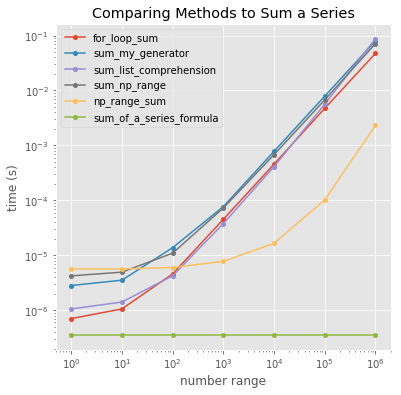

In [20]:
plt.style.use('ggplot')
ax = df_res.plot(figsize=(6,6),
                 logy=True,
                 logx=True,
                 title='Comparing Methods to Sum a Series',
                 marker='.',
                markersize=8)

ax.set_ylabel('time (s)')
ax.set_xlabel('number range')
plt.show()

# Bokeh Plot

In [21]:
p = figure(plot_width=500, plot_height=500, x_axis_type="log", y_axis_type="log")
source = ColumnDataSource(df_res)

In [22]:
func_names = list(df_res.columns)
func_names

['for_loop_sum',
 'sum_my_generator',
 'sum_list_comprehension',
 'sum_np_range',
 'np_range_sum',
 'sum_of_a_series_formula']

In [23]:
for func in func_names:
    p.line(x='a_number_range',
           y=func,
           source=source)
    
    p.circle(x='a_number_range',
           y=func,
           source=source)

p_hover = HoverTool(
        tooltips = [ ("function name","@"), 
                    ("Weight (t)","@weight"),
                    ("Trailer","@trailer_config"), 
                    ("CaTRo Unloading", "@planned_arrival{%Y-%b-%d}"),
                    ("Module at Site", "@planned_departure{%Y-%b-%d}")
                    ], 
        formatters = {"planned_arrival" : "datetime", "planned_departure": "datetime" },
        mode = 'mouse'
    )
p.add_tools(p_hover)

    
show(p)
# output to static HTML file
#output_file("line.html")

NameError: name 'HoverTool' is not defined

In [24]:
df_res = df_res.reset_index(level=0).melt(id_vars='a_number_range', var_name ='function name', value_name='time')


In [31]:
df_res.head()

,a_number_range,function name,time
0,1,for_loop_sum,7.050000e-07
1,10,for_loop_sum,1.057000e-06
2,100,for_loop_sum,4.584000e-06
3,1000,for_loop_sum,4.513500e-05
4,10000,for_loop_sum,4.566390e-04


In [33]:
source = ColumnDataSource(df_res)

p = figure()

categories = np.sort(df_res['function name'].unique())
color_mapper = CategoricalColorMapper(factors=categories, palette=Accent[len(categories)])

p.circle(x='a_number_range', y='time', legend='function name', color = dict(field='function name', transform=color_mapper))


show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: a_num_range, function name, time [renderer: GlyphRenderer(id='bd6adfa4-1885-45a8-8765-1d324484534b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: a_number_range, function name, time [renderer: GlyphRenderer(id='b7ab2fe3-7935-4ed6-bf14-5f7b40adf21d', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: a_number_range, function name, time [renderer: GlyphRenderer(id='3fd9bd8f-6ee0-4309-b681-b1110ddbc8d9', ...)]


In [75]:
p_hover = HoverTool(
        tooltips = [ ("function name","@"), 
                    ("Weight (t)","@weight"),
                    ("Trailer","@trailer_config"), 
                    ("CaTRo Unloading", "@planned_arrival{%Y-%b-%d}"),
                    ("Module at Site", "@planned_departure{%Y-%b-%d}")
                    ], 
        formatters = {"planned_arrival" : "datetime", "planned_departure": "datetime" },
        mode = 'mouse'
    )
p.add_tools(p_hover)



# output to static HTML file
#output_file("line.html")

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: time [renderer: GlyphRenderer(id='8611d4fa-612b-4d35-a9b1-432d52599fac', ...)]


### _reasoning for using min of timeit results_

https://docs.python.org/2/library/timeit.html#timeit.Timer.timeit

`Note It’s tempting to calculate mean and standard deviation from the result vector and report these. However, this is not very useful. In a typical case, the lowest value gives a lower bound for how fast your machine can run the given code snippet; higher values in the result vector are typically not caused by variability in Python’s speed, but by other processes interfering with your timing accuracy. So the min() of the result is probably the only number you should be interested in. After that, you should look at the entire vector and apply common sense rather than statistics.`